In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import seaborn as sns
import os

from sklearn.model_selection import KFold, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

from lightgbm import LGBMRegressor
from tqdm import tqdm
import optuna
from functools import partial
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('..\\kaggle_data\\train.csv')
test = pd.read_csv('..\\kaggle_data\\test.csv')

In [3]:
root_directory = 'N:\\kaggle_data\\march'
wave = 'xgb1'
preds_target = f'{root_directory}\\w{wave}_preds'
subs_target = f'{root_directory}\\w{wave}_subs'
study_target = f'{root_directory}\\w{wave}_study'

In [4]:
preds_list_final_iterations = np.load(f'{root_directory}\\w{wave}_preds\\_preds_list_final_iterations.npy')
preds_list_final_iteration_scores = np.load(f'{root_directory}\\w{wave}_preds\\_preds_list_final_iteration_scores.npy')

<AxesSubplot:ylabel='target'>

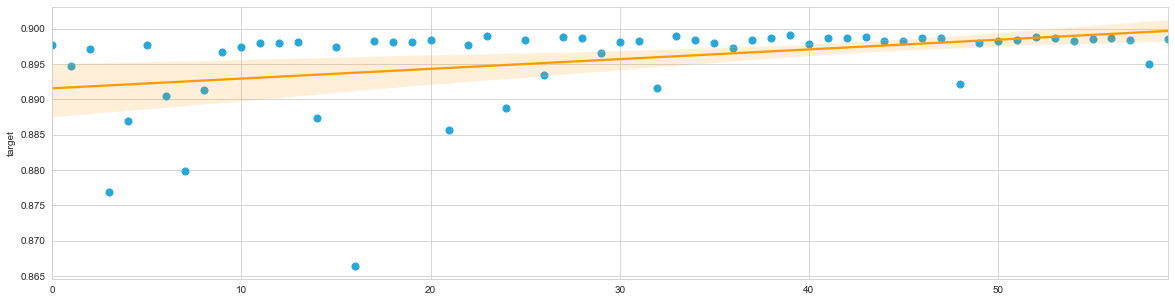

In [5]:
a4_dims = (20, 5)
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=a4_dims)

data = pd.DataFrame(preds_list_final_iteration_scores,columns = ['target'])
sns.regplot(ax=ax, x=data.index, y="target", data=data, x_estimator=np.mean, scatter_kws={"color": "#27a7d8"}, line_kws={"color": "#ff9a00"})

In [6]:
working_set = []

for x in range(0, len(preds_list_final_iteration_scores)):
    this_set = []
    this_set.append(preds_list_final_iteration_scores[x])
    this_set.append(preds_list_final_iterations[x])
    working_set.append(this_set)
cluster_data = pd.DataFrame(working_set,columns = ['target','data'])
cluster_data

,target,data
0,0.897643,"[0.09665564, 0.06728231, 0.12170218, 0.1015627..."
1,0.894755,"[0.0686236, 0.06116528, 0.137486, 0.12100792, ..."
2,0.897060,"[0.049562294, 0.09078682, 0.117118865, 0.09614..."
3,0.876924,"[0.060438134, 0.10452559, 0.13862589, 0.168063..."
4,0.886924,"[0.08769858, 0.11524558, 0.11586849, 0.1440791..."
5,0.897656,"[0.075859904, 0.065557644, 0.10160346, 0.08289..."
6,0.890479,"[0.051029813, 0.06850783, 0.11967024, 0.111463..."
7,0.879829,"[0.13885732, 0.2079023, 0.15328793, 0.18024011..."
8,0.891316,"[0.06286943, 0.07201921, 0.11799496, 0.1107755..."
9,0.896724,"[0.05305029, 0.07928452, 0.10646099, 0.0873122..."


In [9]:
threshold = 0.898
filtered_data = cluster_data[cluster_data['target']>threshold]
print(f'length of target set = {len(filtered_data.index)}')
filtered_data['data'].mean()

length of target set = 34


array([0.07239283, 0.07053369, 0.11615857, ..., 0.04816902, 0.9481871 ,
       0.01501025], dtype=float32)

In [10]:
submission = pd.DataFrame({'id':test.id,
          'target':filtered_data['data'].mean()})
file_target = f'{root_directory}\\w{wave}_subs\\greater_than_0_898.csv'
submission.to_csv(file_target, index=False)

ValueError: array length 8418 does not match index length 200000